# Metodo di Metropolis Hastings

Il metodo consiste nella generazione di una sequenza di numeri casuali che seguono la distribuzione voluta in cui **un numero è correlato al precedente**. Questo tipo di sequenze prendono il nome di **Markov Chain Monte Carlo**.

Indicheremo qui $\vec{x}=(x,y)$ un punto in uno spazio a due dimensioni, ma l'approccio è generalizzabile a $n$ dimensioni.

Si definisce una regola per generare $\vec{x^\prime}$ abbastanza vicino ad $\vec{x}$. Ad esempio, generando uno scostamento distribuito uniformemente o secondo una gaussiana a $n$ dimensioni centrato su $\vec{x}$ con una data varianza $\sigma$ su ciascuna coordinata.

Il metodo consiste nei seguenti passi:
1. si parte da un punto $\vec{x}$ e si calcola $f=f(\vec{x})$
1. si genera $\vec{x}^\prime$ a partire da $\vec{x}$ con la regola definita sopra
1. si calcola $f^\prime=f(\vec{x}^\prime)$
1. se $f^\prime \ge f$ si accetta $\vec{x}^\prime$ come nuovo punto della sequenza; altrimenti si accettasolo con una probabilità $p=f^\prime/f < 1$.
1. si torna al punto 2

È necessario scartare un certo numero di punti iniziali perché il punto di partenza potrebbe trovarsi in una regione dove la densità di probabilità è molto bassa.

Per costruzione, la distribuzione di probabilità dei punti nella sequenza sarà proporzionale a $f(\vec{x})$, e non è necessario cacolare il coefficiente di normalizzazione.

In [1]:
from scipy.stats import norm
from scipy.stats import uniform
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
def fn(x, y):
    g1 = 0.35*math.exp(-0.5*math.pow((x - 4), 2))*math.exp(-0.5*math.pow((y - 6), 2))
    g2 = 0.65*math.exp(-0.5*math.pow((x - 6), 2))*math.exp(-0.5*math.pow((y - 4), 2))
    return g1 + g2

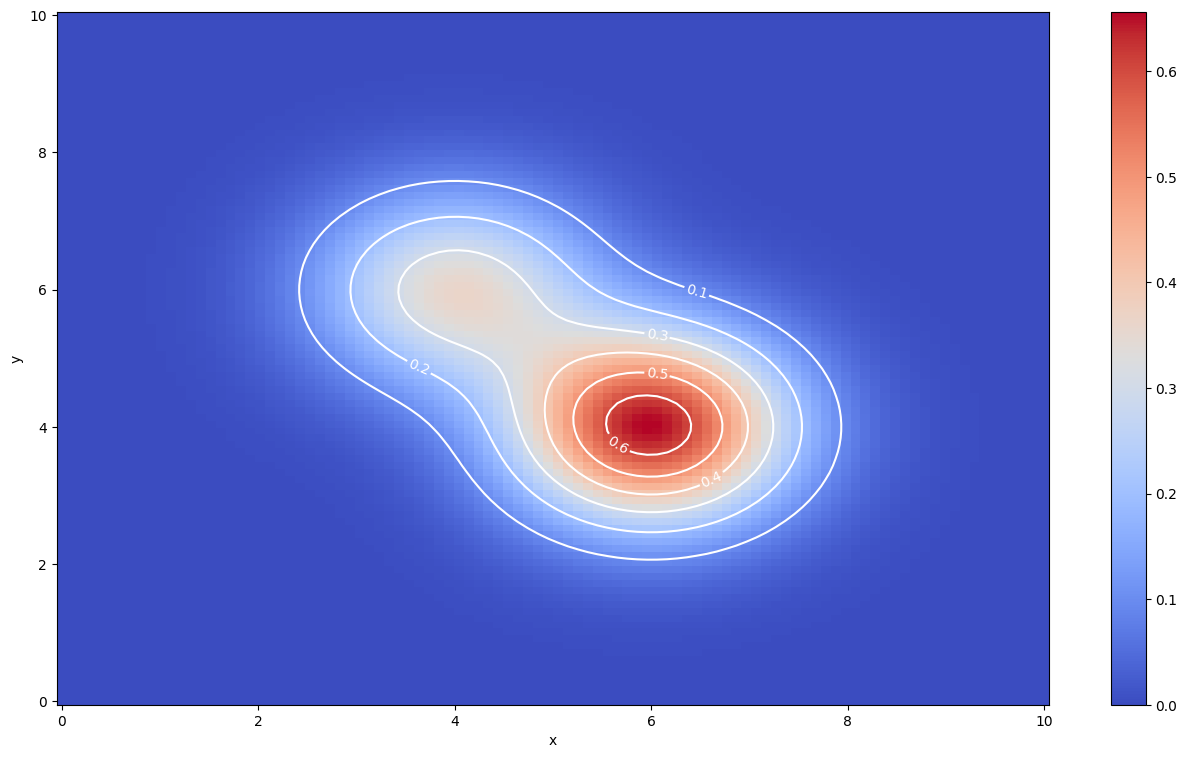

In [5]:
fig, ax = plt.subplots(figsize=(16,9))
x_p = np.linspace(0, 10, 100)
y_p = np.linspace(0, 10, 100)
x, y = np.meshgrid(x_p, y_p)
z = np.vectorize(fn)(x, y)
col = ax.pcolormesh(x, y, z, cmap=cm.coolwarm, vmin=z.min(), vmax=z.max(), shading='auto')
con = ax.contour(x, y, z, np.arange(0, 0.9, 0.1), colors='white')
ax.clabel(con, inline=1, fontsize=10)
fig.colorbar(col,aspect=20)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [20]:
n, ni = 20000, 20
sigma = 0.5
xx, yy = np.empty(n), np.empty(n)
xt, yt = 9, 9
ft = fn(xt, yt)
for i in range(n):
    xx[i], yy[i] = xt, yt
    while True:
        x1, y1 = xt + norm.rvs(scale=sigma), yt + norm.rvs(scale=sigma)
        f1 = fn(x1, y1)
        r = f1/ft
        if r > 1: break
        elif uniform.rvs() <= r: break
    xt, yt, ft = x1, y1, f1

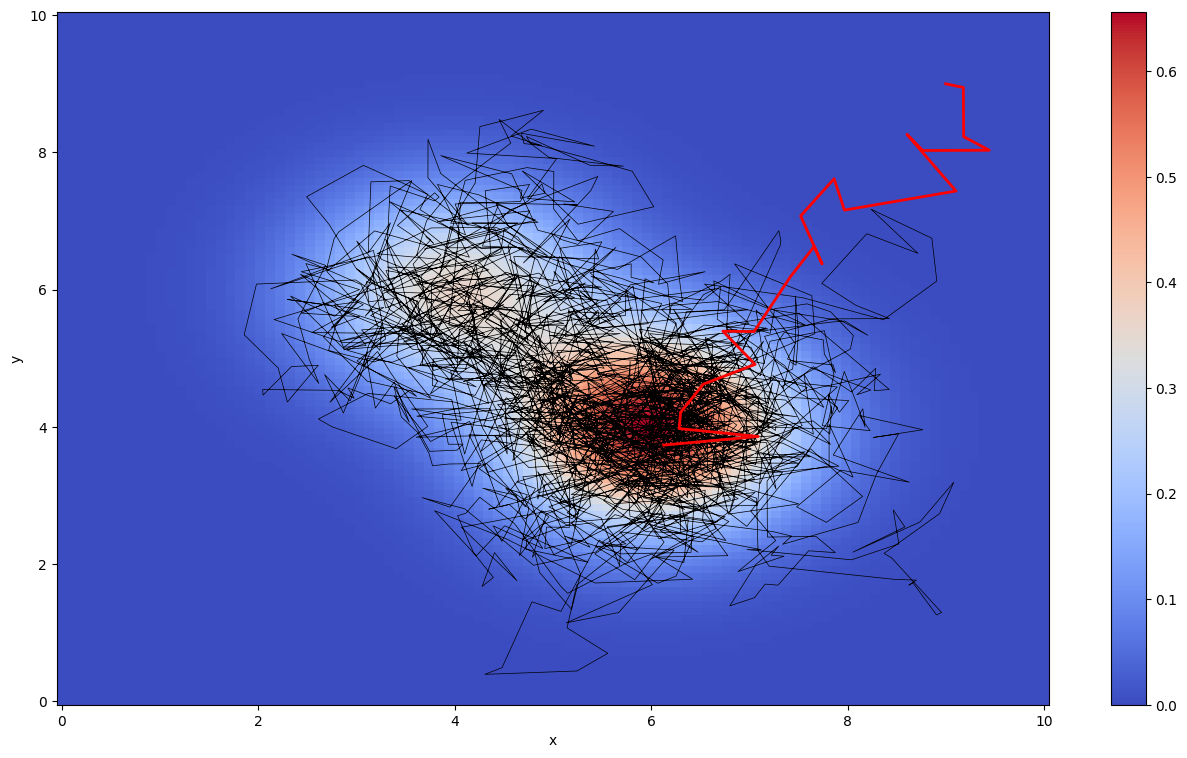

In [21]:
fig, ax = plt.subplots(figsize=(16,9))
x_p = np.linspace(0, 10, 100)
y_p = np.linspace(0, 10, 100)
x, y = np.meshgrid(x_p, y_p)
z = np.vectorize(fn)(x, y)
col = ax.pcolormesh(x, y, z, cmap=cm.coolwarm, vmin=z.min(), vmax=z.max(), shading='auto')
fig.colorbar(col,aspect=20)
nplot = 2000
plt.plot(xx[ni:nplot],yy[ni:nplot], linewidth=0.5, color='black')
plt.plot(xx[:ni+1],yy[:ni+1], linewidth=2, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

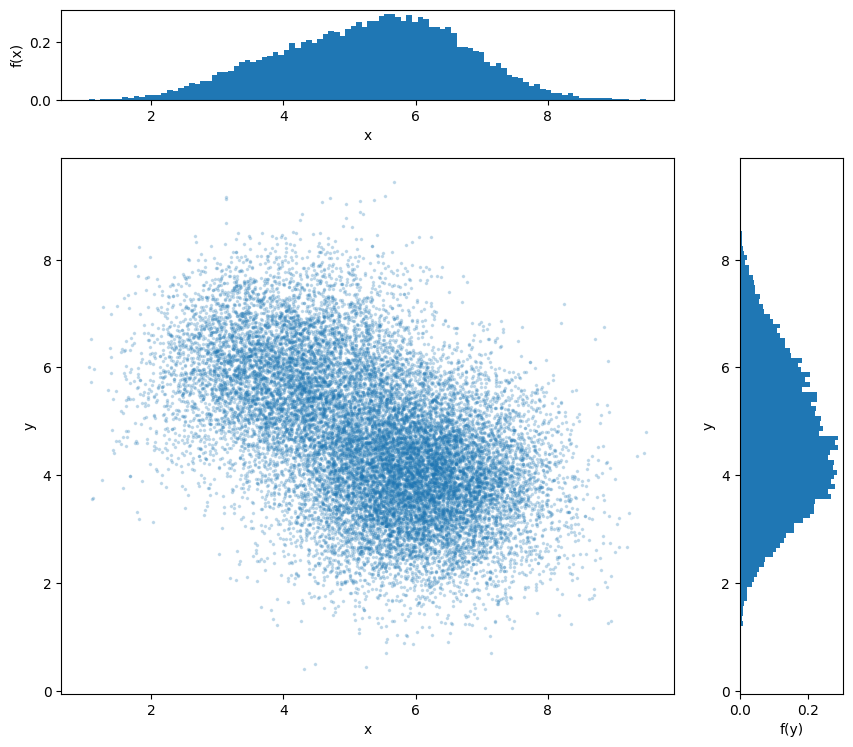

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(10, 12)
ax0 = plt.subplot(gs[6:10, 5:9])
axx = plt.subplot(gs[5:6, 5:9])
axy = plt.subplot(gs[6:10, 9:10])
ax0.scatter(xx[ni:], yy[ni:], marker='.', s=10, alpha=0.2)
ax0.set_xlabel('x')
ax0.set_ylabel('y')
nx, binsx, px = axx.hist(xx[ni:], 100, density=True)
axx.set_xlabel('x')
axx.set_ylabel('f(x)')
ny, binsy, py = axy.hist(yy[ni:], 100, density=True, orientation='horizontal')
axy.set_xlabel('f(y)')
axy.set_ylabel('y')
fig.tight_layout()

## Approfondimenti

* [MCMC and the Ising Model](https://tanyaschlusser.github.io/posts/mcmc-and-the-ising-model/) (c'è una discussione sull'interpretazione bayesiana, da leggere dopo aver seguito le prossime lezioni)
* [Ising model demo](https://physics.weber.edu/schroeder/software/demos/IsingModel.html)
* [Ising model online](https://mattbierbaum.github.io/ising.js/)
* [Ising Model, python](https://rajeshrinet.github.io/blog/2014/ising-model/)

## Spunti per esercizi

* implementare un MCMC per una PDF a scelta in 3 dimensioni e graficarne le tre proiezioni monodimensionali ($x$, $y$, e $z$) e le 3 proiezioni bidimensionali ($xy$, $yz$ e $zx$)